In [1]:
%pylab inline

%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import torch

In [3]:
#
# create device
#

device = (
    torch.device("cuda:{}".format(config.TORCH_GPU_ID))
    if torch.cuda.is_available()
    else torch.device("cpu")
)

print(device)

cpu


In [4]:
model_path = "/Users/mroberts/code/github/interiorsim/code/experiments/srcc/models/mobilenet-nnconv5dw-skipadd-pruned.pth.tar"
saved_model = torch.load(model_path, map_location=device)

saved_model

/Users/mroberts/opt/anaconda3/envs/srcc-env/lib/python3.7/site-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/Users/mroberts/opt/anaconda3/envs/srcc-env/lib/python3.7/site-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/Users/mroberts/opt/anaconda3/envs/srcc-env/lib/python3.7/site-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.batchnorm.BatchNorm2d' 

{'args': Namespace(arch='mobilenet', batch_size=16, criterion='l1', cuda=True, data='nyudepthv2', decoder='nnconv5dw', epochs=20, evaluate='', finetune='/home/tjy/Temp/depth_estimation/prune_by_mac_12282018/master/iter_52_best_model.pth.tar', gpu='0', lr=0.01, max_depth=0.0, modality='rgb', momentum=0.9, num_samples=0, pretrained=True, print_freq=50, resume='', skip='add', sparsifier='uar', start_epoch=0, weight_decay=0.0005, workers=3),
 'epoch': 15,
 'arch': 'mobilenet',
 'model': MobileNetSkipAdd(
   (conv0): Sequential(
     (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
     (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (2): ReLU6(inplace=True)
   )
   (conv1): Sequential(
     (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
     (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (2): ReLU6(inplace=True)
     (3): Conv2

In [6]:
model = saved_model["model"]

model

MobileNetSkipAdd(
  (conv0): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU6(inplace=True)
  )
  (conv1): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU6(inplace=True)
    (3): Conv2d(16, 56, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (4): BatchNorm2d(56, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU6(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(56, 56, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=56, bias=False)
    (1): BatchNorm2d(56, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU6(inplace=True)
    (3): Conv2d(56, 88, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (4): 

In [7]:
model.eval() # switch to evaluate mode

MobileNetSkipAdd(
  (conv0): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU6(inplace=True)
  )
  (conv1): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU6(inplace=True)
    (3): Conv2d(16, 56, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (4): BatchNorm2d(56, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU6(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(56, 56, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=56, bias=False)
    (1): BatchNorm2d(56, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU6(inplace=True)
    (3): Conv2d(56, 88, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (4): 

In [88]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [89]:
import skimage
import skimage.data
import skimage.transform

(256, 256, 3)


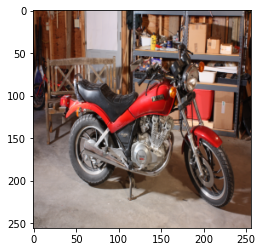

In [127]:
img_l, img_r, img_depth = skimage.data.stereo_motorcycle()
img_l_ = skimage.transform.resize(img_l, (256,256,3)).astype(np.float32)

figsize(4,4)
print(img_l_.shape)
imshow(img_l_);

In [131]:
import torchvision.transforms

transform_to_tensor = torchvision.transforms.ToTensor()
batch = transform_to_tensor(img_l_).expand(1,3,-1,-1)

print(batch.shape)

torch.Size([1, 3, 256, 256])


In [116]:
pred = model(batch)

print(pred.shape)

torch.Size([1, 1, 256, 256])


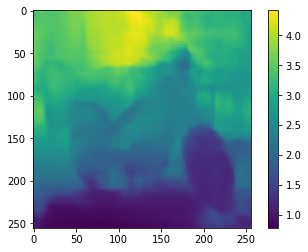

In [118]:
transform_to_img = torchvision.transforms.ToPILImage()

img_pred = pred[0]

imshow(img_pred.detach().numpy().squeeze());
colorbar();

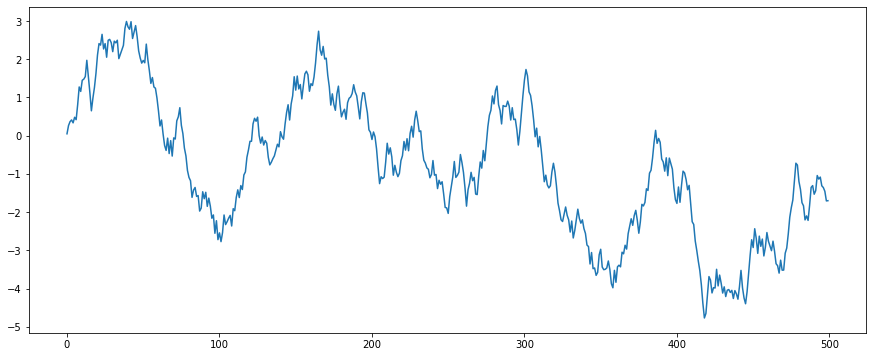

In [123]:
n_samples = 500

np.random.seed(0)
x = np.random.random(n_samples) - 0.5
x_cumsum = np.cumsum(x)

figsize(15,6)
plot(x_cumsum);